<a href="https://colab.research.google.com/github/NattiMan/ML-and-DL-projects/blob/main/CO2_emissions_prediction_Rwanda_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTS**

In [7]:
import tensorflow as tf  # models
import pandas as pd  # reading and processing data
import seaborn as sns  # visualization
import numpy as np  # math computations
import matplotlib.pyplot as plt  # plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [8]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_column' contains the IDs you want to replace
label_encoder = LabelEncoder()


In [9]:
print(tf.__version__)

2.12.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import mean_squared_error


## **EDA**

In [16]:
data=pd.read_csv("train.csv")
data

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [17]:
data.shape


(79023, 76)

In [18]:
data.columns[:]

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [25]:
columns_to_drop = ['UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_solar_zenith_angle']
cleaned_data = data.drop(columns=columns_to_drop)

cleaned_data.shape

(79023, 69)

In [26]:
num_rows_with_missing_values = data.isnull().any(axis=1).sum()
print(num_rows_with_missing_values)

78585


In [27]:
num_rows_with_missing_values = cleaned_data.isnull().any(axis=1).sum()
print(num_rows_with_missing_values)

21814


In [29]:
# drop all the rows with at least one missing data
cleaned_data=cleaned_data.fillna(0)
cleaned_data

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,0.000000,0.000000,0.000000,0.000000,0.000000,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,0.000000,0.000000,0.000000,0.000000,0.000000,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [35]:
cleaned_data['ID']=cleaned_data.index
cleaned_data=cleaned_data.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1)


X=cleaned_data.drop(['emission'], axis=1)
y=cleaned_data['emission']
X

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,ID
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,0
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,1
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,2
3,-0.510,29.290,2019,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,3
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,79018
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,79019
79020,-3.299,30.301,2021,50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,79020
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,79021


In [37]:
complete = pd.DataFrame()

for column in X.columns:
    rolling_average = X[column].rolling(window=4, min_periods=1).mean()
    complete[column] = rolling_average

complete

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,ID
0,-0.510,29.290,2019.0,0.0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,0.0
1,-0.510,29.290,2019.0,0.5,-0.000044,0.665616,-0.000026,0.193328,-41.000513,44.990377,...,3657.813264,64027.644152,2894.846454,12.129567,0.264561,8.865195,37.595024,-141.985176,29.001960,0.5
2,-0.510,29.290,2019.0,1.0,0.000142,0.693144,0.000111,0.165558,-3.068396,47.616523,...,3844.204340,62708.060917,3101.991859,15.120848,0.260074,11.036091,35.197290,-142.163299,28.065738,1.0
3,-0.510,29.290,2019.0,1.5,0.000107,0.519858,0.000083,0.124169,-2.301297,35.712392,...,4190.280189,59797.182523,3371.737224,15.187361,0.260566,5.453718,32.493057,-139.788931,28.256592,1.5
4,-0.510,29.290,2019.0,2.5,0.000114,0.538177,0.000088,0.090543,23.377492,31.880399,...,4269.320665,60463.511576,3556.884630,13.323901,0.251455,18.244031,32.933198,-140.469777,26.119711,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021.0,46.5,-0.000001,1.076317,0.000024,0.206143,37.029562,48.056655,...,6048.766603,57282.959524,5099.129259,17.646536,0.281958,-14.149207,39.692585,-126.878510,30.393301,79016.5
79019,-3.299,30.301,2021.0,47.5,0.000006,1.041611,0.000030,0.205069,29.828040,44.256755,...,5824.973592,58907.752360,4878.792743,16.226210,0.295864,-16.950344,38.057340,-129.300288,31.019157,79017.5
79020,-3.299,30.301,2021.0,48.5,0.000027,0.748800,0.000058,0.156623,32.963874,35.310005,...,6045.737389,57660.059713,5091.831168,16.573122,0.303792,-1.541310,40.426644,-132.213437,30.770596,79018.5
79021,-3.299,30.301,2021.0,49.5,0.000083,0.801477,0.000094,0.138186,-10.095266,27.005689,...,6296.184618,55988.667211,5354.878682,18.440804,0.295229,-5.596633,42.816430,-134.591988,30.673929,79019.5


In [38]:
y

0         3.750994
1         4.025176
2         4.231381
3         4.305286
4         4.347317
           ...    
79018    29.404171
79019    29.186497
79020    29.131205
79021    28.125792
79022    27.239302
Name: emission, Length: 79023, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [40]:
X_train
# , X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,ID
33427,-1.712,28.688,2019,37,-0.000167,1.023480,-1.783160e-04,0.234254,-101.635268,15.867969,...,5336.489974,60940.356508,4336.489903,10.795767,0.265263,-64.789212,45.915175,-81.953063,28.680995,33427
62222,-2.599,29.801,2020,0,0.000118,0.893736,9.658283e-05,0.125201,16.434759,40.563267,...,5774.930664,59210.729167,5108.263997,7.669134,0.302121,-41.890157,27.760501,-134.090403,30.589327,62222
592,-0.569,30.031,2021,9,-0.000002,0.701277,2.795172e-07,0.148807,-14.328541,23.189616,...,7826.425883,45974.655236,6826.425936,9.765855,0.296868,15.920496,48.378270,-112.252277,18.362881,592
4925,-0.859,30.441,2021,49,-0.000055,1.376798,-7.565842e-05,0.141985,-101.128136,21.436977,...,8094.306088,43537.883729,7094.306235,50.325686,0.335854,30.582614,44.606285,-139.123102,30.800928,4925
74285,-2.939,30.461,2019,32,-0.000252,0.683512,-1.667889e-04,0.090235,5.190875,33.019300,...,4437.446025,68512.668090,3611.103832,6.968579,0.192885,-56.179354,26.622449,-54.251003,30.111794,74285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71623,-2.855,29.145,2020,20,0.000066,0.816138,2.847091e-05,0.142044,-98.978964,49.938137,...,4992.658227,63329.292782,4137.229187,12.001920,0.378708,-13.033431,52.039108,-41.865702,32.849538,71623
20395,-1.327,30.973,2019,43,-0.000154,0.797103,-1.268218e-04,0.128855,-42.499924,46.678772,...,7588.269909,47628.532271,6588.269844,13.045769,0.285613,38.832934,39.479872,-122.219006,25.534521,20395
16659,-1.211,30.389,2021,17,-0.000035,0.869696,-2.861153e-05,0.127618,-12.587259,35.638144,...,5745.419751,61028.765237,4745.419826,12.482879,0.323144,-42.317833,44.655521,-53.682459,28.642693,16659
31556,-1.649,29.351,2020,21,0.000446,0.720172,3.159911e-04,0.041960,-42.184974,34.728989,...,8432.730469,40617.429688,7432.730469,7.619209,0.329258,-98.765518,50.511814,-50.392097,38.182861,31556


In [41]:
# Create a Normalization layer
normalizer = Normalization(axis=-1)

# Fit the Normalization layer to your data
normalizer.adapt(X_train)
 # The layer will calculate the mean and standard deviation from the data

# Use the Normalization layer to transform your data
normalized_data = normalizer(X_train)
normalized_data

<tf.Tensor: shape=(63218, 68), dtype=float32, numpy=
array([[ 2.56510764e-01, -1.47136617e+00, -1.22557259e+00, ...,
         1.10926695e-01,  1.87948927e-01, -2.65397787e-01],
       [-1.01887739e+00, -9.72010866e-02, -8.96979240e-04, ...,
        -1.24978113e+00,  5.76319098e-01,  9.95123863e-01],
       [ 1.89999306e+00,  1.86767563e-01,  1.22377861e+00, ...,
        -6.79838181e-01, -1.91192162e+00, -1.70277333e+00],
       ...,
       [ 9.76882339e-01,  6.28771603e-01,  1.22377861e+00, ...,
         8.48747730e-01,  1.80153683e-01, -9.99428928e-01],
       [ 3.47096354e-01, -6.52793944e-01, -8.96979240e-04, ...,
         9.34621394e-01,  2.12170196e+00, -3.47302139e-01],
       [ 1.50601733e+00,  9.59657013e-01, -1.22557259e+00, ...,
        -2.10955385e-02, -1.58514559e+00, -1.54027784e+00]], dtype=float32)>

## **Model Creation and Training**

In [ ]:
normalized_data.shape

TensorShape([63218, 68])

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (68,)),
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1),
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1581/1581 [==============================] - 4s 2ms/step - loss: 20581.2070 - mean_absolute_error: 68.2555 - val_loss: 17369.9492 - val_mean_absolute_error: 60.8428
Epoch 2/20
1581/1581 [==============================] - 3s 2ms/step - loss: 18676.5078 - mean_absolute_error: 60.8690 - val_loss: 16274.7217 - val_mean_absolute_error: 63.1992
Epoch 3/20
1581/1581 [==============================] - 3s 2ms/step - loss: 17536.1152 - mean_absolute_error: 59.7839 - val_loss: 15854.7822 - val_mean_absolute_error: 55.9716
Epoch 4/20
1581/1581 [==============================] - 3s 2ms/step - loss: 16752.5312 - mean_absolute_error: 59.1606 - val_loss: 15655.1201 - val_mean_absolute_error: 56.5278
Epoch 5/20
1581/1581 [==============================] - 3s 2ms/step - loss: 16122.0713 - mean_absolute_error: 58.0194 - val_loss: 17444.3184 - val_mean_absolute_error: 61.2108
Epoch 6/20
1581/1581 [==============================] - 3s 2ms/step - loss: 15305.9746 - mean_absolute_error: 57.5831 - 

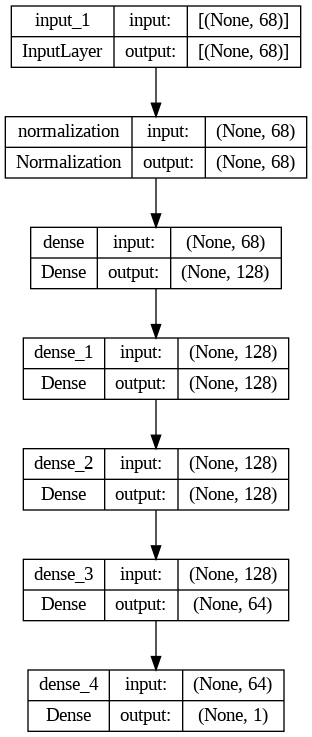

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.12),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [ ]:
y_pred=model.predict(X_test)
y_pred

494/494 [==============================] - 1s 1ms/step


array([[ 42.87863 ],
       [ 91.04134 ],
       [ 88.98288 ],
       ...,
       [141.7746  ],
       [ 36.561188],
       [  9.359778]], dtype=float32)

In [ ]:
mean_squared_error(y_test, y_pred)

19070.17398803773

## **Random Forest Model**

In [42]:
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm_notebook as tqdm

In [43]:
RF_Model = RandomForestRegressor(n_estimators=100, random_state=42)
# XG_model=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [44]:
RF_Model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_estimated=RF_Model.predict(X_test)

In [46]:
y_estimated

array([ 30.64766214, 492.5844386 ,  17.63536387, ..., 216.997007  ,
        61.75812697, 181.9093836 ])

In [47]:
mean_squared_error(y_test, y_estimated)

577.0527910507518

## **Preparing the Test Data**

In [48]:
# the first step will be filling up the NaN values

raw_test=pd.read_csv('test.csv')
raw_test

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [49]:
columns_to_drop = ['UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_solar_zenith_angle']
raw_test=raw_test.drop(columns=columns_to_drop)
raw_test.shape

(24353, 68)

In [50]:
raw_test=raw_test.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1)
raw_test

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,38.215228,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [51]:
data_columns = raw_test.columns

for column in data_columns:
    column_median = raw_test[column].median()
    raw_test[column].fillna(column_median, inplace=True)

    # print("The median of " + column + ": " + str(column_median))


raw_test

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.510,29.290,2022,0,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,-3.299,30.301,2022,45,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,-3.299,30.301,2022,46,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,38.215228,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


## **Problem solving and prediction**

In [ ]:
data_test=pd.read_csv('test.csv')
data_test

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [ ]:
columns_to_drop = ['UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_solar_zenith_angle']
data_test=data_test.drop(columns=columns_to_drop)

In [ ]:
# data_test=data_test.dropna()

In [ ]:
raw_test['ID']=raw_test.index + 73932
x=raw_test
x

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,ID
0,-0.510,29.290,2022,0,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583,73932
1,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380,73933
2,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361,73934
3,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774,73935
4,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807,73936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,...,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562,98280
24349,-3.299,30.301,2022,45,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975,98281
24350,-3.299,30.301,2022,46,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472,98282
24351,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,38.215228,...,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455,98283


In [ ]:
X.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [ ]:
x.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [ ]:
x.shape

(24353, 68)

In [ ]:
X.shape

(79023, 68)

In [ ]:
difference = [excess for excess in x if excess not in X]
difference

[]

In [ ]:
y_est=RF_Model.predict(x)
y_est

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning: invalid value encountered in divide
  y_hat /= len(self.estimators_)


array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
y_est.shape

(24353,)

In [ ]:
x.shape

(24353, 68)

In [ ]:
y_est.shape

(24353,)

In [ ]:
submit_file=pd.DataFrame(data_test)
submit_file=submit_file.drop(columns=[col for col in submit_file.columns if col != 'ID_LAT_LON_YEAR_WEEK'])
submit_file['emission']=y_est
submit_file.to_csv('emission_prediction_RF_2.csv', index=False)



In [ ]:
import os

print(os.getcwd())

/content
